#**Assignment 1: Face Recognition**
---



**Name1:** Ali Hassan Ali Ahmed ElSharawy - **ID1:** 19016013

**Name2:** Ziad Mohamed Abuelkher  - **ID2:** 19015733 

**Name3:** Youssef Magdy Helmy - **ID3:** 19016937

#Problem Statement:
We intend to perform face recognition. Face recognition means that for a given image you can tell the subject id. Our database of subject is very simple. It has 40 subjects. Below we will show the needed steps to achieve the goal of the assignment.


---



#1. Download the Dataset and Understand the Format


Imports

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import cv2
import matplotlib.pyplot as plt
import sklearn as sk
from google.colab import files
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


connect to google drive to load data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


check that we are in the right location otherwise , go to location of our data

In [ ]:
!pwd
!ls

/content
drive  sample_data


face_recognition folder is where we stored the faces dataset

In [ ]:
os.chdir('drive/MyDrive/face_recognition')
!ls
!pwd

1PzB-dTdr2muezPn6LgPi1PK-hAsxdKNp  s12	s17  s21  s26  s30  s35  s4   s8
face_recognition.zip		   s13	s18  s22  s27  s31  s36  s40  s9
s1				   s14	s19  s23  s28  s32  s37  s5   view
s10				   s15	s2   s24  s29  s33  s38  s6
s11				   s16	s20  s25  s3   s34  s39  s7
/content/drive/MyDrive/face_recognition


Result:

1PzB-dTdr2muezPn6LgPi1PK-hAsxdKNp  s12	s17  s21  s26  s30  s35  s4   s8
face_recognition.zip		   s13	s18  s22  s27  s31  s36  s40  s9
s1				   s14	s19  s23  s28  s32  s37  s5   view
s10				   s15	s2   s24  s29  s33  s38  s6
s11				   s16	s20  s25  s3   s34  s39  s7
/content/drive/MyDrive/face_recognition

now we are at location of all faces, the next cell is done to get familiar of our data and display images


image reshape :  (112, 92)


data as matrix :  [[108 108 106 ... 103 106 105]
 [110 104 110 ... 104 102 109]
 [108 106 109 ... 103 105 104]
 ...
 [ 77  79  74 ...  73  71  69]
 [ 75  90 128 ...  70  71  70]
 [132 176 193 ...  69  69  70]]


data type :  <class 'numpy.ndarray'>

image after get flatten : 
[108, 108, 106, 107, 106, 108, 108, 106, 107, 106, 108, 107, 106, 107, 107, 104, 110, 76, 98, 98, 92, 95, 38, 58, 52, 77, 60, 60, 92, 67, 58, 51, 55, 62, 44, 37, 70, 72, 60, 37, 46, 40, 40, 42, 42, 42, 45, 52, 45, 47, 46, 49, 57, 53, 62, 67, 65, 65, 61, 74, 69, 67, 66, 67, 82, 75, 93, 91, 77, 88, 74, 73, 80, 76, 94, 98, 107, 104, 107, 105, 104, 107, 103, 104, 106, 103, 106, 102, 109, 103, 106, 105, 110, 104, 110, 107, 108, 105, 107, 106, 107, 107, 106, 109, 107, 103, 94, 90, 97, 70, 58, 96, 77, 99, 41, 43, 58, 67, 43, 42, 68, 62, 44, 35, 49, 37, 44, 42, 44, 41, 47, 33, 36, 40, 35, 35, 39, 48, 44, 47, 38, 34, 37, 44, 46, 49, 59, 61, 66, 58, 52, 60, 65, 71, 57, 65, 71, 74, 87, 76, 88, 72

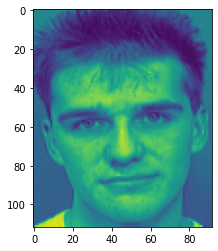

In [ ]:
dir = "s30"     #  feel free to change it from 1 to 40
os.chdir(dir)
string = "9"   #  feel free to change it from 1 to 10
x = cv2.imread(string+".pgm",-1)
nparr = x.reshape(1, 10304)
y = x
print("image reshape : ",x.shape)
print("\n")
print("data as matrix : ",x)
print("\n")
print("data type : ",type(x))
os.chdir('..')
x = list(x.flat)
print("\nimage after get flatten : ")
print(x)
print("\n")
print("class  : ",dir[1:3])
plt.imshow(y)



***Comments:***



image reshape :  (112, 92)


data as matrix :  [[108 108 106 ... 103 106 105]
 [110 104 110 ... 104 102 109]
 [108 106 109 ... 103 105 104]
 ...
 [ 77  79  74 ...  73  71  69]
 [ 75  90 128 ...  70  71  70]
 [132 176 193 ...  69  69  70]]


data type :  <class 'numpy.ndarray'>

image after get flatten : 
[108, 108, 106, 107, 106, 108, 108, 106, 107, 106, ...

class  :  30
<matplotlib.image.AxesImage at 0x7f1da29085e0>
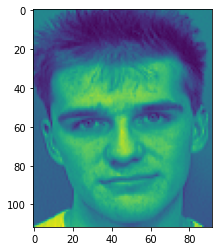

#2. Generate the Data Matrix and the Label vector


In [ ]:
# !ls
# os.chdir("..")
# !pwd

Runtime of importing data: 3m 25s

**load data from drive to local variables : data, label**

In [ ]:
data = []
label = []
for i in range(1,41):
  os.chdir("s"+str(i))
  for j in range(1,11):
    img = cv2.imread(str(j) + ".pgm",-1)
    data.append(list(img.flat))
    label.append(i)
  os.chdir("..")



We are working with Numpy Arrays, so the data and labels lists are transformed to np.ndarray

In [ ]:
data = np.array(data)
label = np.array(label)

In [ ]:
print(data.shape)

(400, 10304)


(400, 10304)


#3. Split the Dataset into Training and Test sets


In [ ]:
training_set = data[1::2] # even rows
training_labels = label[1::2]
testing_set = data[::2] # odd rows
testing_labels = label[::2]



---



#4. Classification using PCA


A) Use the pseudo code below for computing the projection matrix U, 

**Helping Functions**

In [ ]:
def compute_eigens(matrix):
  values, vectors = np.linalg.eigh(matrix)
  # putting them in descending order
  values = values[::-1]
  vectors = vectors[:, ::-1]
  return values, vectors

In [ ]:
def compute_eigens_number(alpha, eigen_values):
  total_sum = sum(eigen_values)
  for i in range(len(eigen_values)):
    explained_variance = sum(eigen_values[:i+1])/total_sum
    if(explained_variance >= alpha):
      return i+1

**Main Algorithm**

In [ ]:
def PCA_impl_repetetive(Data):
  mean_vector = np.mean(Data, axis = 0)
  centered_data = Data - mean_vector
  cov_matrix = np.cov(centered_data, bias=True, rowvar=False)
  eigen_values, eigen_vectors = compute_eigens(cov_matrix)
  return eigen_values, eigen_vectors

***Comment:*** Above we can see the repetitive part in the pca algorithm, where we find the eigen vectors and eigen values.

Next, the implementation varies following the different values of alpha. So the common part is run once, then the different part will be run 4 times (for each value of alpha)

In [ ]:
def PCA_impl(alpha, eigen_values, eigen_vectors):
  fraction_of_total_variance = compute_eigens_number(alpha, eigen_values)
  projection_matrix = eigen_vectors[:, :fraction_of_total_variance]
  return projection_matrix

***Comments:*** 

rowvar=false means that the features are on the columns, not the rows (!default).

eigh() is used instead of eig() because: 

1- covariance matrix is always symmetric.

2- eigh() returns sorted eigen values, while eig() doesn't.

3- faster than eig() with big matrices.

4- eigh neglect imaginary part

**Define the alpha = {0.8,0.85,0.9,0.95}.**

Runtime of generating eigen value & vectors: 5m

In [ ]:
alpha = [0.8, 0.85, 0.9, 0.95]
values, vectors = PCA_impl_repetetive(training_set)
projection_matrices = []
for i in range(len(alpha)):
  projection_matrices.append(PCA_impl(alpha[i], values, vectors))

In [ ]:
for i in range(len(projection_matrices)):
  print(projection_matrices[i].shape)

(10304, 37)
(10304, 53)
(10304, 77)
(10304, 116)


(10304, 37)

(10304, 53)

(10304, 77)

(10304, 116)

As we can see, eigen vectors chosen for alpha = 0.8 are 37, for alpha = 0.85 are 53, ...

B) Project the training set, and test sets separately using the same projection matrix.

In [ ]:
def reduce_dimension(projection_matrix, data):
  return np.matmul(data, projection_matrix)

In [ ]:
def calculate_projected_matrices(projection_mat, train_set, test_set):
  return reduce_dimension(projection_mat, train_set), reduce_dimension(projection_mat, test_set)

In [ ]:
projected_training0, projected_testing0 = calculate_projected_matrices(projection_matrices[0], training_set, testing_set) # alpha=0.8
projected_training1, projected_testing1 = calculate_projected_matrices(projection_matrices[1], training_set, testing_set) # alpha=0.85
projected_training2, projected_testing2 = calculate_projected_matrices(projection_matrices[2], training_set, testing_set) # alpha=0.9
projected_training3, projected_testing3 = calculate_projected_matrices(projection_matrices[3], training_set, testing_set) # alpha=0.95

print(f"projected train 0 = {projected_training0.shape}, projected test 0 = {projected_testing0.shape}")
print(f"projected train 1 = {projected_training1.shape}, projected test 1 = {projected_testing1.shape}")
print(f"projected train 2 = {projected_training2.shape}, projected test 2 = {projected_testing2.shape}")
print(f"projected train 3 = {projected_training3.shape}, projected test 3 = {projected_testing3.shape}")

projected train 0 = (200, 37), projected test 0 = (200, 37)
projected train 1 = (200, 53), projected test 1 = (200, 53)
projected train 2 = (200, 77), projected test 2 = (200, 77)
projected train 3 = (200, 116), projected test 3 = (200, 116)


Just making sure of the correctness of dimensions:

projected train 0 = (200, 37), projected test 0 = (200, 37)

projected train 1 = (200, 53), projected test 1 = (200, 53)

projected train 2 = (200, 77), projected test 2 = (200, 77)

projected train 3 = (200, 116), projected test 3 = (200, 116)

C) Use a simple classifier (first Nearest Neighbor to determine the class labels)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(training_set, testing_labels)
print(knn.predict(testing_set))

[16  2  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19  8 20
 20  3 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 30 31 32 32 32  2 32 33 33 33 33 33 34 34 34
 34 34 40 35 35 35 35 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40  5  5  5]


[16  2  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19  8 20
 20  3 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 30 31 32 32 32  2 32 33 33 33 33 33 34 34 34
 34 34 40 35 35 35 35 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40  5  5  5]

D) Report Accuracy for every value of alpha separately.

In [ ]:
def knn1PCA(projected_training, training_labels, projected_testing, testing_labels):
  knn.fit(projected_training, training_labels)
  return knn.score(projected_testing, testing_labels)

alpha= 0.8 -->  accuracy0 = 0.93
alpha= 0.85 -->  accuracy1 = 0.94
alpha= 0.9 -->  accuracy2 = 0.945
alpha= 0.95 -->  accuracy3 = 0.935


Text(0, 0.5, 'accuracy')

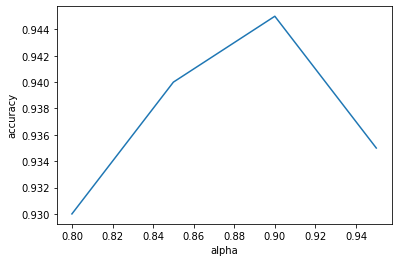

In [ ]:
accuracies = []
accuracies.append(knn1PCA(projected_training0, training_labels, projected_testing0, testing_labels))
accuracies.append(knn1PCA(projected_training1, training_labels, projected_testing1, testing_labels))
accuracies.append(knn1PCA(projected_training2, training_labels, projected_testing2, testing_labels))
accuracies.append(knn1PCA(projected_training3, training_labels, projected_testing3, testing_labels))

for i in range(len(accuracies)):
  print(f"alpha= {alpha[i]} -->  accuracy{i} = {accuracies[i]}")

plt.plot(np.array(alpha),accuracies)
plt.xlabel('alpha')
plt.ylabel('accuracy')

alpha= 0.8 -->  accuracy0 = 0.93

alpha= 0.85 -->  accuracy1 = 0.94

alpha= 0.9 -->  accuracy2 = 0.945

alpha= 0.95 -->  accuracy3 = 0.935

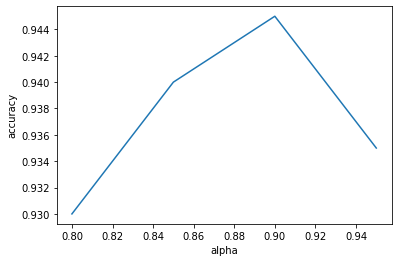

**E) Can you find a relation between alpha and classification accuracy?**

Increasing alpha should increase accuracy, but it is not a must after a certain threshold, which is here equal to 0.90 ..

Afterall, differences in accuracy are not significant at all in the range of these values for alpha (0.8 -> 0.95)

6'- Classifier Tuning: 

A) Set the number of neighbors in the K-NN classifier to 1,3,5,7

B) Tie Breaking: built-in, explained in the classifier tuning section

C) Plot (or tabulate) the performance measure (accuracy) against the K value.

Apply K-NN with i neighbours for each alpha>

In [ ]:
def KnnPCA(projected_training, training_labels, projected_testing, testing_labels, alpha):
  accuracy = []
  for i in range(1,8,2):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(projected_training, training_labels)
    # print(knn.predict(projected_testing0))
    currentAcc = knn.score(projected_testing, testing_labels)
    # print(currentAcc)
    accuracy.append(currentAcc)

  print(f"Alpha = {alpha}:")
  j = 0
  for i in range(1,8,2):
    print(f"for {i} neigbour -> accuracy = {round(accuracy[j],3)}")
    j+=1
  plt.plot(np.array([1,3,5,7]),accuracy)
  plt.title(f'PCA accuracy')
  plt.xlabel('neighbour')
  plt.ylabel('accuracy')
  # plt.xticks()
  # plt.yticks()

Alpha = 0.8:
for 1 neigbour -> accuracy = 0.93
for 3 neigbour -> accuracy = 0.855
for 5 neigbour -> accuracy = 0.805
for 7 neigbour -> accuracy = 0.78
Alpha = 0.85:
for 1 neigbour -> accuracy = 0.94
for 3 neigbour -> accuracy = 0.855
for 5 neigbour -> accuracy = 0.83
for 7 neigbour -> accuracy = 0.775
Alpha = 0.9:
for 1 neigbour -> accuracy = 0.945
for 3 neigbour -> accuracy = 0.85
for 5 neigbour -> accuracy = 0.815
for 7 neigbour -> accuracy = 0.755
Alpha = 0.95:
for 1 neigbour -> accuracy = 0.935
for 3 neigbour -> accuracy = 0.845
for 5 neigbour -> accuracy = 0.815
for 7 neigbour -> accuracy = 0.74


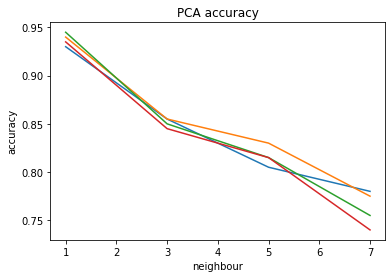

In [ ]:
KnnPCA(projected_training0, training_labels, projected_testing0, testing_labels, 0.80)
KnnPCA(projected_training1, training_labels, projected_testing1, testing_labels, 0.85)
KnnPCA(projected_training2, training_labels, projected_testing2, testing_labels, 0.90)
KnnPCA(projected_training3, training_labels, projected_testing3, testing_labels, 0.95)

Alpha = 0.8:

for 1 neigbour -> accuracy = 0.93
for 3 neigbour -> accuracy = 0.855
for 5 neigbour -> accuracy = 0.805
for 7 neigbour -> accuracy = 0.78

Alpha = 0.85:

for 1 neigbour -> accuracy = 0.94
for 3 neigbour -> accuracy = 0.855
for 5 neigbour -> accuracy = 0.83
for 7 neigbour -> accuracy = 0.775

Alpha = 0.9:

for 1 neigbour -> accuracy = 0.945
for 3 neigbour -> accuracy = 0.85
for 5 neigbour -> accuracy = 0.815
for 7 neigbour -> accuracy = 0.755

Alpha = 0.95:

for 1 neigbour -> accuracy = 0.935
for 3 neigbour -> accuracy = 0.845
for 5 neigbour -> accuracy = 0.815
for 7 neigbour -> accuracy = 0.74

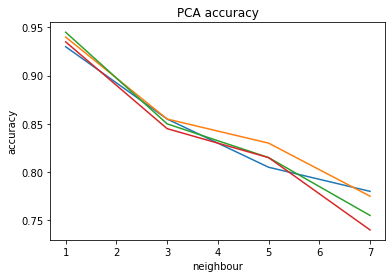



---



#5. Classification Using LDA


LDA main function used to get projection matrix to project our data with new dimensions <br> which is eigen vectors corresponding to greatest 40 eigen values.


In [ ]:
def LDA(data_matrix, labels, new_dim):

  #cast data matrix to float
  data_matrix = data_matrix.astype('float64')
  
  # classify our data matrix according to its corresponding class
  # class_data_matrix is 3d array array[class[images of class]]
  class_data_matrix, unique_labels = classify_data(data_matrix, labels)
  class_number = len(unique_labels)
  feature_number = data_matrix.shape[1]

  # calc mean vector for images in each class.
  class_mean_vectors = calc_mean_vectors(data_matrix, class_data_matrix, class_number, feature_number)

  # calc overall mean vector for all images in train set.
  overall_mean_vector = calc_overall_sample_mean(data_matrix, feature_number)

  sb = calc_sb(class_data_matrix, class_mean_vectors, overall_mean_vector, class_number, feature_number)

  centered_class_data_matrix = center_data_matrix(class_data_matrix, class_mean_vectors)
  print('centered data matrix:')
  print(centered_class_data_matrix.shape)
  print(centered_class_data_matrix)

  s = calc_s(centered_class_data_matrix, class_mean_vectors, feature_number)

  lambd, vectors = np.linalg.eigh(np.dot(np.linalg.inv(s),sb))
  print('Eigens')
  print('Eigen values:')
  print(lambd.shape)
  print(lambd)  
  print('Eigen vectors:')
  print(vectors.shape)
  print(vectors)  

  # pick 39 eigen vectors corresponding to max 39 eigen values
  vectors = vectors.T
  projection_matrix = vectors[-new_dim:]
  print('Projection shape:')
  print(projection_matrix.shape)
  print('Projection Matrix:')
  print(projection_matrix)


  return projection_matrix, class_mean_vectors

We classify faces according to its class so all images of same face are grouped together.<br>
class i -> all images of face i:

in this function , we assume that data_matrix and labels should be sorted
as classes and labels flows to funtion in descending order

In [ ]:
# classify data
def classify_data(data_matrix,labels):
  unique_labels, s = np.unique(labels, return_index=True)
  class_data_matrix = np.asarray(np.split(data_matrix,s[1:]))
  print('classified data matrix:')
  print(class_data_matrix.shape)
  print(class_data_matrix)
  print('unique labels:')
  print(unique_labels)
  return class_data_matrix, unique_labels


We calculate mean vector for each class.


In [ ]:
def calc_mean_vectors(data_matrix, class_data_matrix, class_number, feature_number):
  class_mean_vectors = np.zeros((class_number, feature_number))
  for i in range(class_number):
    class_mean_vectors[i] = np.mean(class_data_matrix[i], axis = 0)
  print('Mean Vectors for each class:')
  print(class_mean_vectors.shape)
  print(class_mean_vectors)
  return class_mean_vectors

We calculate the overall mean vector for the whole data set samples.

In [ ]:
def calc_overall_sample_mean(data_matrix, feature_number):
  overall_mean_vector = np.mean(data_matrix, axis = 0).reshape(1,feature_number)
  print('overall samples mean vector:')
  print(overall_mean_vector.shape)
  print(overall_mean_vector)
  return overall_mean_vector

We calculate classes scatter matrix sb.<br>
𝑆𝑏=Σ𝑛𝑘(𝜇𝑘−𝜇)(𝜇𝑘−𝜇)𝑇.

In [ ]:
def calc_sb(class_data_matrix, class_mean_vectors, overall_mean_vector, class_number, feature_number):
  sb = np.zeros((feature_number, feature_number))
  for i in range(class_number):
    sb += ( len(class_data_matrix[i]) * np.dot((class_mean_vectors[i] - overall_mean_vector).T, class_mean_vectors[i] - overall_mean_vector) )
  print('SB:')
  print(sb.shape)
  print(sb)
  return sb

We centerize our data matrix. Zi = Di - 𝜇i.

In [ ]:
def center_data_matrix(class_data_matrix,class_mean_vectors):
  for i in range(len(class_data_matrix)):
    class_data_matrix[i] -= class_mean_vectors[i]
  return class_data_matrix

we calculate scatter matrix S = ΣSi where Si = (Zi.T)(Zi).

In [ ]:
def calc_s(centered_class_data_matrix, class_mean_vectors, feature_number):
  s = np.zeros((feature_number, feature_number))
  for i in range(len(centered_class_data_matrix)):
    s += (np.dot(centered_class_data_matrix[i].T, centered_class_data_matrix[i]))
  print('S:')
  print(s)
  print(s.shape)
  return s

**K-NN Classifier for LDA**

Get projection matrix to transfor to our new dimension.

In [ ]:
projection_matrix, mean_vectors = LDA(training_set, training_labels,39)
print(projection_matrix.shape)
print(projection_matrix)


classified data matrix:
(40, 5, 10304)
[[[ 60.  60.  62. ...  32.  34.  34.]
  [ 63.  53.  35. ...  41.  10.  24.]
  [ 43.  50.  41. ... 158. 153. 169.]
  [ 44.  43.  32. ...  43.  43.  37.]
  [ 34.  34.  33. ...  37.  40.  33.]]

 [[ 37.  35.  35. ...  26.  28.  28.]
  [ 34.  36.  35. ...  32.  25.  25.]
  [ 34.  35.  35. ...  31.  24.  24.]
  [ 34.  39.  35. ... 135. 138. 148.]
  [ 37.  34.  38. ... 135. 143. 133.]]

 [[100.  99. 108. ...  44.  42.  44.]
  [105. 102. 108. ...  42.  35.  37.]
  [110. 106. 109. ...  49.  53.  53.]
  [107. 104. 109. ...  58.  56.  57.]
  [104. 109. 103. ...  57.  56.  59.]]

 ...

 [[104. 106. 107. ...  65.  59.  73.]
  [110. 111. 114. ...  65.  72.  65.]
  [114. 112. 110. ...  67.  70.  68.]
  [113. 109. 113. ...  72.  66.  71.]
  [108. 105. 104. ...  72.  73.  48.]]

 [[ 75.  77.  75. ... 116. 114. 113.]
  [ 74.  74.  78. ... 109. 113. 120.]
  [ 97.  94.  92. ... 144. 143. 129.]
  [ 88.  85.  89. ... 117. 117. 116.]
  [ 89.  87.  92. ...  93. 112. 109

Next pictures are snippets of the results of the above function (LDA)

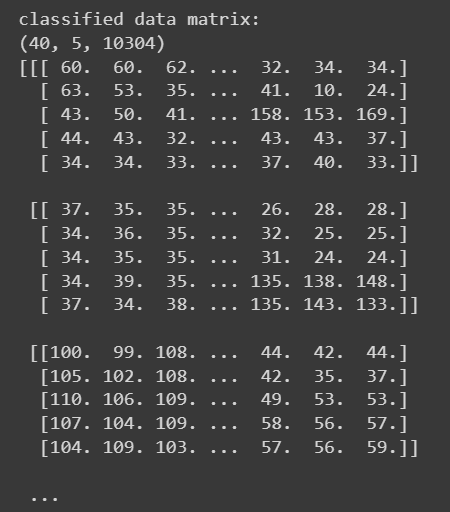

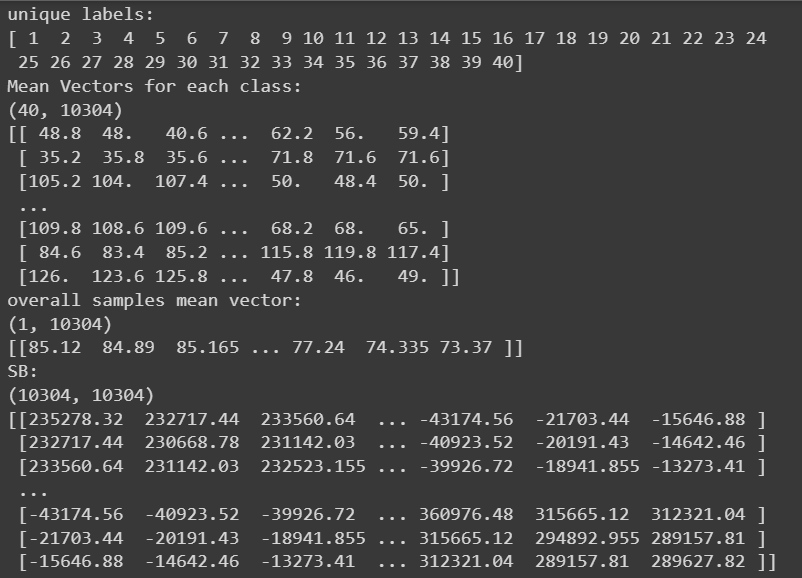

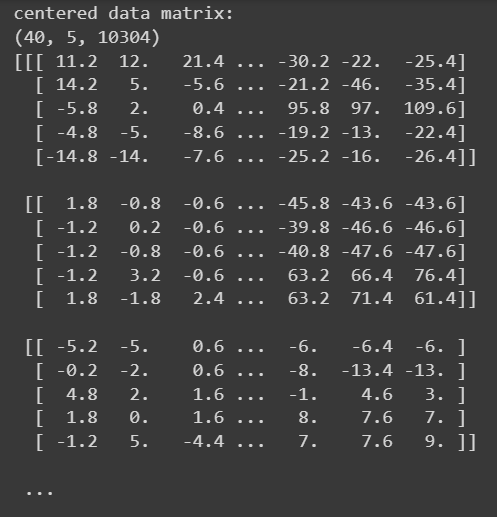

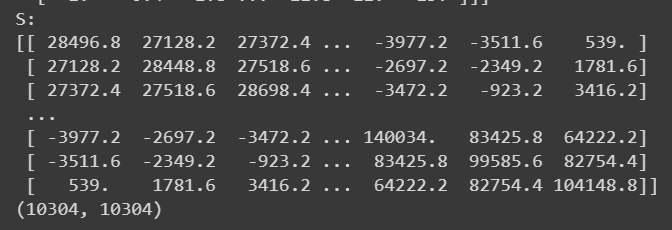

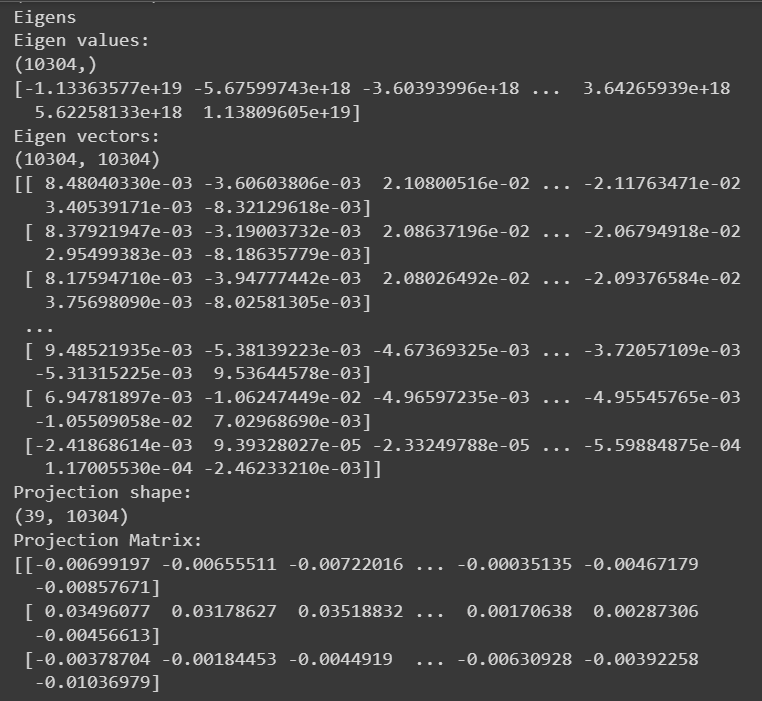

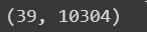

Project train & test data sets.

In [ ]:
projected_train_data = np.dot(training_set, projection_matrix.T)
projected_test_data = np.dot(testing_set, projection_matrix.T)

Apply K-NN with i neighbours.

In [ ]:
accuracy = []
for i in range(1,12,2):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(projected_train_data, training_labels)
  print(knn.predict(projected_test_data))
  acc = knn.score(projected_test_data, testing_labels)
  print(acc)
  accuracy.append(acc)

[16  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 11 20
 20  4 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 39 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 40 15 35 35 35  7 36  7 36 36 37 37 37 37 37 38 38 38 38 23 39 39
 39 39 39 40 40 40  5  5]
0.945
[16  1  1  1  1  2  2  2  2  2  3  3 25  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 15 16  1 16 16  4 17  4 17 17 18 18 18 18 18 19 19 19 19 11 20
 20  4 20 20 21 21 21 21 21 22 22 22 22 22 38 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 

[16  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 11 20
 20  4 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 39 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 40 15 35 35 35  7 36  7 36 36 37 37 37 37 37 38 38 38 38 23 39 39
 39 39 39 40 40 40  5  5]

0.945

[16  1  1  1  1  2  2  2  2  2  3  3 25  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 15 16  1 16 16  4 17  4 17 17 18 18 18 18 18 19 19 19 19 11 20
 20  4 20 20 21 21 21 21 21 22 22 22 22 22 38 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 25 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 21 31 31 21 21 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 40 15 18 35 13  7 36  7 36 36 28 28 37 28 28 38 38 38 38 38 39 39
 39 39 39 40 40  5  5  5]

0.87

[16  1  1  1  1  2  2  2  2  2  3  3 25  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 14 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16  1 16 16  4 17 16 17 17 18 18 18 18 18 19 19 19 19 27 20
 20  4 20 23 21 21 21 21 21 22 22 22 22 22 38 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 11 27 28 28 19 19 28 29 29 29 29
 29 30 30 30 30 30 21 31 31 21 21 32 32 32 15 32 33 33 33 33 33 34 34 34
 34 34 40 15  5 25 13  7 36  7 36 36 28 28 37 28 28 38 38 38 38 38 39 39
 39 29 39 40 40 18  5  5]

0.84

[16  1  1  1  1  2  2  2  2  2  3  3 25  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 14 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 35 15 15 16  1 16 16  4 17  4 17 17 18 18 18 18 18 19 19 19 19 27 20
 20  4 20 23 21 21 21 21 21 22 22 22 22 22 38 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 13 26 19 19 27 11 27 28 28 37 19 28 29 29 29 29
 29 30 30 30 30 30 21 34 34 21 21 32 32 32  2 32 33 33 20 33 20 34 34 34
 34 34 40 15 18 25 13  7 36  7 36 36 28 28 37 26 28 38 38 38 38 38 22 39
 39 39 39 40 26 18  5  5]

0.79

[16  1  1  1  1  2  2  2  2  2  3  3 25  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 18 14 14 14 14 11 15  2
 15 35 15 24 16  1 16 16 16 17  4 17 17 18 18 18 18 18 19 19 19 19 27 20
 20  4 20 23 21 21 21 21 21 22 22 22 22 22 38 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 13 26 19 19  2 11 27 37 37 37 19 19 29 29 29 29
 29 30 30 30 30 30 21 34 34 21 21 32 32 32  2 32 33 33 33 33 20 34 34 34
 34 34 40 15 13 25 13  7  7  7 36 36 26 13 37 26 13 38 38 38 38 38 39 22
 39 39 39 40  5 18  5  5]

0.76

[16  2  1  1  1  2  2  2  2  2  3  3 25  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 19 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 11 15  2
 15 35 15 24 16  1 16 16  4 17  4 17 17 18 18 18 18 18 19 19 19 19 27 20
 20  4 20 23 21 21 21 21 21 22 22 22 22 22 38 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 13 26  2 19  2 11 27 37 37 19 19 27 29 29 29 29
 29 21 30 30 30 21 21 34 34 21 21 32 32 32  2  2 33 33 33 33 20 34 34 34
 34 22 40 15 13 25 13  7  7  7 36 17 26 13 14 26 13 38 38 38 38 38 22 22
 39 39 39 40  5 18  5 18]

0.72

Plot LDA accuracy with different neighbours classifier:

for 0 neigbour -> accuracy = 0.945
for 1 neigbour -> accuracy = 0.87
for 2 neigbour -> accuracy = 0.84
for 3 neigbour -> accuracy = 0.79
for 4 neigbour -> accuracy = 0.76
for 5 neigbour -> accuracy = 0.72


Text(0, 0.5, 'accuracy')

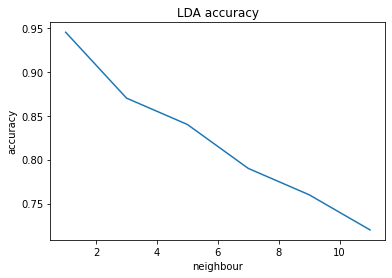

In [ ]:
for i in range(len(accuracy)):
  print(f"for {i} neigbour -> accuracy = {accuracy[i]}")
plt.plot(np.array([1,3,5,7,9,11]),accuracy)
plt.title('LDA accuracy')
plt.xlabel('neighbour')
plt.ylabel('accuracy')
# plt.xticks()
# plt.yticks()


for 0 neigbour -> accuracy = 0.945
for 1 neigbour -> accuracy = 0.87
for 2 neigbour -> accuracy = 0.84
for 3 neigbour -> accuracy = 0.79
for 4 neigbour -> accuracy = 0.76
for 5 neigbour -> accuracy = 0.72

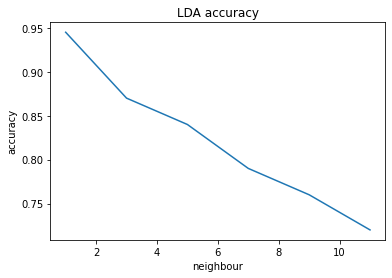

***Comments:*** Here, accuracy is inverse proportional with the neighous number





---



#6. Classifier Tuning
*Done above, herewe just comment.*

**A) Set the number of neighbors in the K-NN classifier to 1,3,5,7**

For PCA, this was done for these 4 values for each value of alpha, so the total runs are 4*4 = 16.

For LDA, this was done for K-NN = 1, 3, 5, 7, 9, 11

**B) Tie breaking at your preferred strategy.**

Sickit K-NN classifier resolves ties by choosing the class that appears first in the set of neighbors.

**C) Plot (or tabulate) the performance measure (accuracy) against the K value. This is to be done for PCA and LDA as well.**

All code and results of this section are done at the end of each algorithm's section: PCA in section 4, LDA in section 5.

***Comments:***





---



#7. Compare vs Non-Face Images


load face data

In [ ]:
!pwd
os.chdir("..")
!pwd

/content/drive/MyDrive/face_recognition
/content/drive/MyDrive


In [ ]:
os.chdir("face_recognition")

In [ ]:
data_face = []
for i in range(1,41):
  os.chdir("s"+str(i))
  for j in range(1,11):
    img = cv2.imread(str(j) + ".pgm",-1)
    data_face.append(list(img.flat))
  os.chdir("..")

In [ ]:
data_face = np.array(data_face)

In [ ]:
print(data_face.shape)

(400, 10304)


(400, 10304)

In [ ]:
!pwd
!ls
os.chdir("..")

/content/drive/MyDrive/face_recognition
1PzB-dTdr2muezPn6LgPi1PK-hAsxdKNp  s12	s17  s21  s26  s30  s35  s4   s8
face_recognition.zip		   s13	s18  s22  s27  s31  s36  s40  s9
s1				   s14	s19  s23  s28  s32  s37  s5   view
s10				   s15	s2   s24  s29  s33  s38  s6
s11				   s16	s20  s25  s3   s34  s39  s7


In [ ]:
from pathlib import Path
entries = Path('nonface_images/')
data_nonface = []
for entry in entries.iterdir():
  img = cv2.imread("nonface_images/"+str(entry.name),0)
  img = cv2.resize(img, (92,112))
  data_nonface.append(list(img.flat))


In [ ]:
data_nonface = np.array(data_nonface)

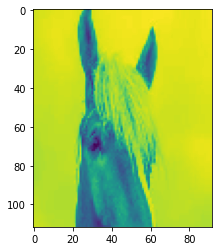

In [ ]:
index = 154        # feel free to change from 0 to 484
plt.imshow(data_nonface[index].reshape(112,92))

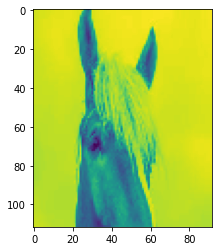

In [ ]:
print(np.mean(data_nonface,axis = 0))

[103.41443299 104.5628866  106.76701031 ...  89.83917526  89.18969072
  89.53814433]


[103.41443299 104.5628866  106.76701031 ...  89.83917526  89.18969072
  89.53814433]

prepare data and labels of our new classification problem

In [ ]:
def get_trian_and_test(data_face, data_nonface, number): 
  print(data_face.shape)
  print(data_nonface.shape)
  data_face_label = np.ones((len(data_face),1))

  X_face_train, X_face_test, y_face_train, y_face_test = train_test_split(data_face, data_face_label, test_size=0.33, random_state=1)

  data_nonface_label = np.zeros((len(data_nonface),1))
  X_nonface_train, X_nonface_test, y_nonface_train, y_nonface_test = train_test_split(data_nonface[:number], data_nonface_label[:number], test_size=0.33, random_state=1)

  X_train = np.concatenate(( X_nonface_train, X_face_train))
  X_test = np.concatenate((X_nonface_test, X_face_test))

  y_train = np.concatenate((y_nonface_train, y_face_train))
  y_test = np.concatenate(( y_nonface_test, y_face_test))

  print(data_face_label.shape)
  print(data_nonface_label.shape)
  print(y.shape)
  return X_train, X_test, y_train, y_test


train and test data

In [ ]:
def nonface_classifier(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  projection_data_matrix, _ = LDA(X_train,y_train, 1)
  projected_X_train = np.dot(X_train, projection_data_matrix.T)
  projected_X_test = np.dot(X_test, projection_data_matrix.T)
  print("\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ pass 1")
  acc = []
  neighbours = [1,2,4,7,10,12]
  for i in neighbours:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(projected_X_train, y_train)
    acc.append(knn.score(projected_X_test, y_test))
  print("\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ pass 2")
  max_value = max(acc)
  index = acc.index(max_value)

  knn = KNeighborsClassifier(n_neighbors= neighbours[index])
  knn.fit(projected_X_train, y_train)
  print("\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ pass 3")
  
  # X_test = scaler.transform(projected_X_test)
  predictions = knn.predict(projected_X_test)
  print("\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ pass 4")
  good_prediction = []
  bad_prediction = []
  for input, prediction, label in zip(X_test, predictions, y_test):
    if prediction != label and len(bad_prediction)!=5:
      bad_prediction.append(input)
    elif prediction == label and len(good_prediction)!=5:
      good_prediction.append(input)
    if len(good_prediction) == 5 and len(bad_prediction) == 5:
      break
      
  return max_value,good_prediction,bad_prediction

tune with number of non faces to values : 80, 160, 240, 320, 400, 485

(400, 10304)
(485, 10304)
(400, 1)
(485, 1)
(112, 92)
classified data matrix:
(2,)
[array([[125., 129., 134., ...,  13.,  13.,  13.],
        [238., 236., 245., ...,  90.,  72.,  90.],
        [  1.,   1.,   1., ...,  35.,  27.,  42.],
        ...,
        [186., 190., 194., ...,  29.,  29.,  28.],
        [ 90.,  89.,  98., ...,  49., 202., 197.],
        [ 61.,  63.,  66., ...,  53.,  49.,  48.]])
 array([[109., 112., 114., ...,  69.,  72.,  69.],
        [105., 106., 100., ...,  76.,  76.,  76.],
        [ 45.,  45.,  48., ...,  76.,  79.,  70.],
        ...,
        [129., 127., 133., ...,  93.,  93.,  93.],
        [ 35.,  40.,  38., ..., 222.,  55.,  34.],
        [118., 114., 117., ...,  58.,  54.,  52.]])]
unique labels:
[0. 1.]
Mean Vectors for each class:
(2, 10304)
[[115.69811321 114.33962264 114.43396226 ...  87.79245283  88.47169811
   88.77358491]
 [ 84.17164179  84.          84.3880597  ...  78.00373134  75.73507463
   73.94402985]]
overall samples mean vector:
(1, 10304

<ipython-input-11-9b1767d87fb2>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  class_data_matrix = np.asarray(np.split(data_matrix,s[1:]))


SB:
(10304, 10304)
[[43980.11511917 42324.43519661 41914.68928151 ... 13655.47993545
  17767.86750913 20687.55268754]
 [42324.43519661 40731.08517016 40336.76459178 ... 13141.40433786
  17098.97654735 19908.74695821]
 [41914.68928151 40336.76459178 39946.26145941 ... 13014.18145299
  16933.44011998 19716.00894049]
 ...
 [13655.47993545 13141.40433786 13014.18145299 ...  4239.91914897
   5516.78315551  6423.32244636]
 [17767.86750913 17098.97654735 16933.44011998 ...  5516.78315551
   7178.17847831  8357.72471819]
 [20687.55268754 19908.74695821 19716.00894049 ...  6423.32244636
   8357.72471819  9731.09858945]]
centered data matrix:
(2,)
[array([[   9.30188679,   14.66037736,   19.56603774, ...,  -74.79245283,
          -75.47169811,  -75.77358491],
        [ 122.30188679,  121.66037736,  130.56603774, ...,    2.20754717,
          -16.47169811,    1.22641509],
        [-114.69811321, -113.33962264, -113.43396226, ...,  -52.79245283,
          -61.47169811,  -46.77358491],
        ...,

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

SB:
(10304, 10304)
[[75522.96522955 75531.17801869 79966.41936932 ... 30760.49889413
  37784.61251072 38742.32428902]
 [75531.17801869 75539.39170093 79975.11536449 ... 30763.84396262
  37788.72142056 38746.53734579]
 [79966.41936932 79975.11536449 84671.30769182 ... 32570.31748026
  40007.70044655 41021.75996429]
 ...
 [30760.49889413 30763.84396262 32570.31748026 ... 12528.74922667
  15389.6702522  15779.74619808]
 [37784.61251072 37788.72142056 40007.70044655 ... 15389.6702522
  18903.87828716 19383.02748807]
 [38742.32428902 38746.53734579 41021.75996429 ... 15779.74619808
  19383.02748807 19874.32149616]]
centered data matrix:
(2,)
[array([[  23.40186916,   32.57009346,   37.3364486 , ...,   54.19626168,
           52.54205607,   50.93457944],
        [ -46.59813084,  -42.42990654,  -40.6635514 , ...,   64.19626168,
           57.54205607,   18.93457944],
        [-114.59813084, -114.42990654, -116.6635514 , ...,  -55.80373832,
          -64.45794393,  -48.06542056],
        ...,


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

SB:
(10304, 10304)
[[83515.67607145 84391.82313084 85149.51359674 ... 39672.16550861
  47391.5418791  52264.9918451 ]
 [84391.82313084 85277.16168224 86042.80093458 ... 40088.35864486
  47888.71752336 52813.29392523]
 [85149.51359674 86042.80093458 86815.31428372 ... 40448.28175129
  48318.67416306 53287.4646185 ]
 ...
 [39672.16550861 40088.35864486 40448.28175129 ... 18845.33287854
  22512.24179192 24827.26003452]
 [47391.5418791  47888.71752336 48318.67416306 ... 22512.24179192
  26892.65473654 29658.12726845]
 [52264.9918451  52813.29392523 53287.4646185  ... 24827.26003452
  29658.12726845 32707.98371112]]
centered data matrix:
(2,)
[array([[141.95625, 141.825  , 141.175  , ...,  25.28125,  23.88125,
          26.9875 ],
        [100.95625, 100.825  , 100.175  , ..., 137.28125, 136.88125,
         136.9875 ],
        [ -1.04375,  -3.175  ,   3.175  , ..., -69.71875, -80.11875,
         -80.0125 ],
        ...,
        [141.95625, 141.825  , 141.175  , ..., 163.28125, 162.88125,
  

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[array([[251., 251., 251., ..., 231., 228., 229.],
        [ 41.,  43.,  45., ...,  50.,  47.,  46.],
        [139., 148., 155., ..., 145., 144., 141.],
        ...,
        [186., 190., 194., ...,  29.,  29.,  28.],
        [111., 112., 114., ..., 104.,  63.,  58.],
        [ 61.,  63.,  66., ...,  53.,  49.,  48.]])
 array([[109., 112., 114., ...,  69.,  72.,  69.],
        [105., 106., 100., ...,  76.,  76.,  76.],
        [ 45.,  45.,  48., ...,  76.,  79.,  70.],
        ...,
        [129., 127., 133., ...,  93.,  93.,  93.],
        [ 35.,  40.,  38., ..., 222.,  55.,  34.],
        [118., 114., 117., ...,  58.,  54.,  52.]])]
unique labels:
[0. 1.]
Mean Vectors for each class:
(2, 10304)
[[109.46728972 111.90186916 114.60747664 ...  91.84579439  90.79439252
   90.31308411]
 [ 84.17164179  84.          84.3880597  ...  78.00373134  75.73507463
   73.94402985]]
overall samples mean vector:
(1, 10304)
[[95.40248963 96.3879668  97.80497925 ... 84.14937759 82.42116183
  81.21161826]]

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ pass 2
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ pass 3
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ pass 4
(400, 10304)
(485, 10304)
(400, 1)
(485, 1)
(112, 92)
classified data matrix:
(2, 268, 10304)
[[[ 35.  40.  35. ... 173. 181. 249.]
  [ 66.  85.  97. ...  38.  36.  34.]
  [221. 221. 221. ... 232. 232. 232.]
  ...
  [ 88.  88.  95. ... 255. 255. 254.]
  [111. 112. 114. ... 104.  63.  58.]
  [ 61.  63.  66. ...  53.  49.  48.]]

 [[109. 112. 114. ...  69.  72.  69.]
  [105. 106. 100. ...  76.  76.  76.]
  [ 45.  45.  48. ...  76.  79.  70.]
  ...
  [129. 127. 133. ...  93.  93.  93.]
  [ 35.  40.  38. ... 222.  55.  34.]
  [118. 114. 117. ...  58.  54.  52.]]]
unique labels:
[0. 1.]
Mean Vectors for each class:
(2, 10304)
[[111.28731343 112.03358209 115.10447761 ...  93.01865672  92.1380597
   93.01119403]
 [ 84.17164179  84.          84.3880597  ...  78.00

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ pass 2
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ pass 3
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ pass 4
(400, 10304)
(485, 10304)
(400, 1)
(485, 1)
(112, 92)
classified data matrix:
(2,)
[array([[  4.,   4.,   4., ...,   5.,  17.,  56.],
        [ 22.,  27.,  31., ...,  34.,  34.,  34.],
        [ 66.,  85.,  97., ...,  38.,  36.,  34.],
        ...,
        [ 88.,  88.,  95., ..., 255., 255., 254.],
        [111., 112., 114., ..., 104.,  63.,  58.],
        [ 61.,  63.,  66., ...,  53.,  49.,  48.]])
 array([[109., 112., 114., ...,  69.,  72.,  69.],
        [105., 106., 100., ...,  76.,  76.,  76.],
        [ 45.,  45.,  48., ...,  76.,  79.,  70.],
        ...,
        [129., 127., 133., ...,  93.,  93.,  93.],
        [ 35.,  40.,  38., ..., 222.,  55.,  34.],
        [118., 114., 117., ...,  58.,  54.,  52.]])]
unique labels:
[0. 1.]
Mean Vectors for ea

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

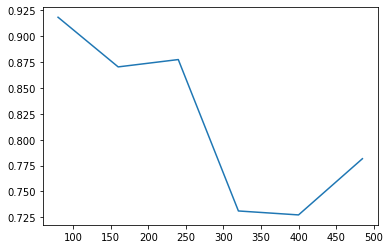

In [ ]:
variant_number = [80, 160, 240, 320, 400, 485]
accuracy = []
good_cases = []
bad_cases = []
for i in variant_number:
  X_train, X_test, y_train, y_test = get_trian_and_test(data_face, data_nonface, i)
  a, good, bad = nonface_classifier(X_train, X_test, y_train, y_test)
  accuracy.append(a)
  good_cases.append(good)
  bad_cases.append(bad)
plt.plot(variant_number,accuracy)


[0.9182389937106918, 0.8702702702702703, 0.8773584905660378, 0.7310924369747899, 0.7272727272727273, 0.7815699658703071]


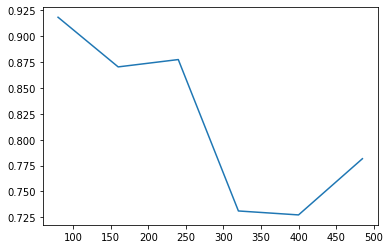

In [ ]:
print(accuracy)
plt.plot(variant_number, accuracy)

In [ ]:
good_cases = np.array(good_cases)
bad_cases = np.array(bad_cases)


 number of non-face images = 80

**success cases**


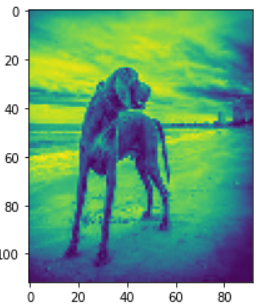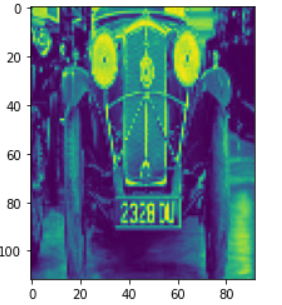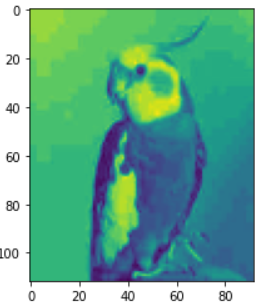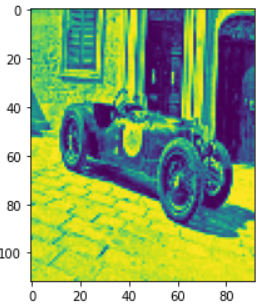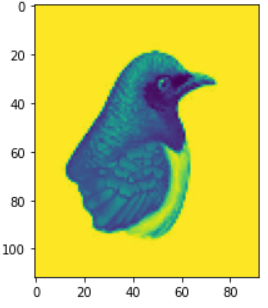

**failure cases**

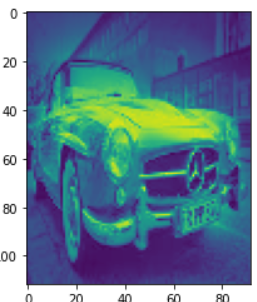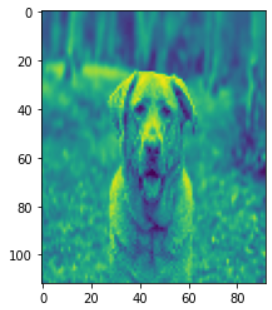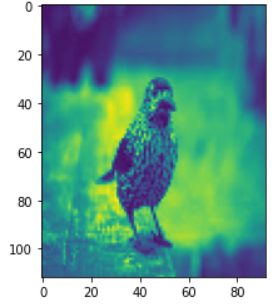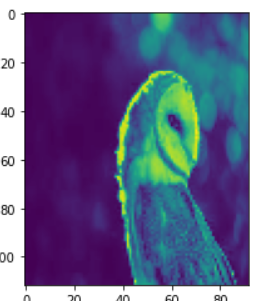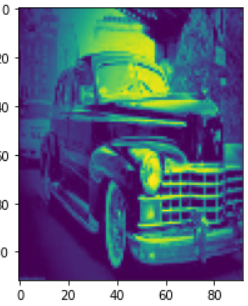

 number of non-face images = 160

**success cases**

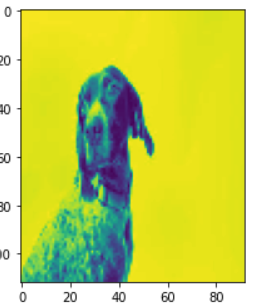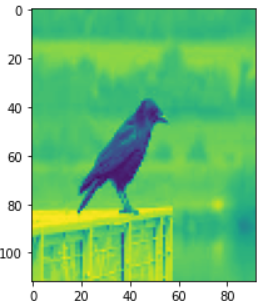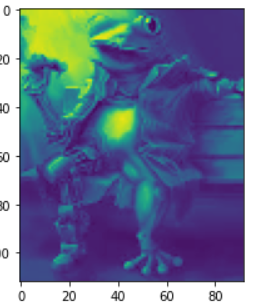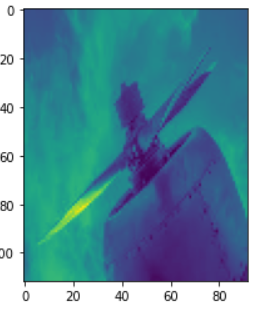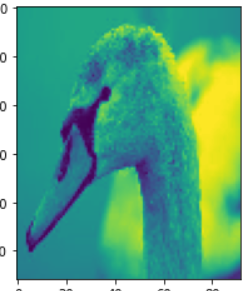

**failure cases**

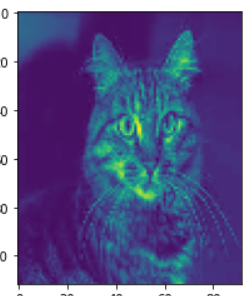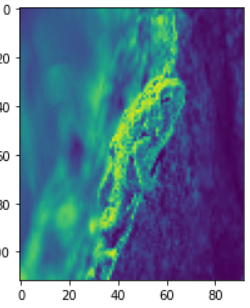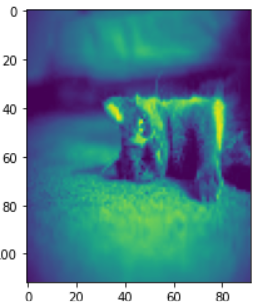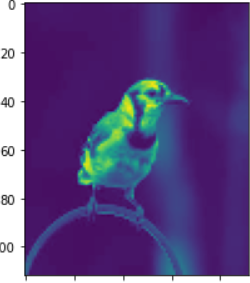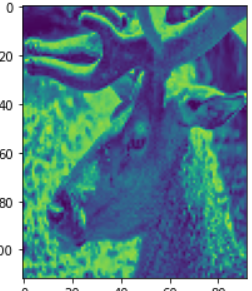

 number of non-face images = 240

**success cases**

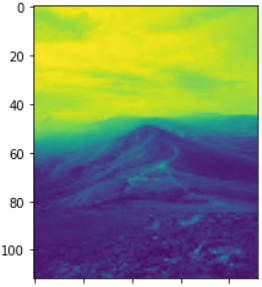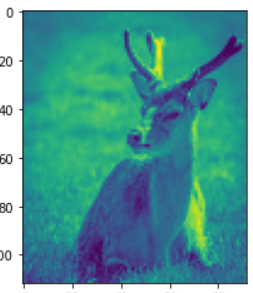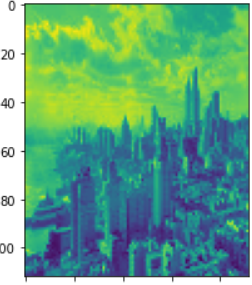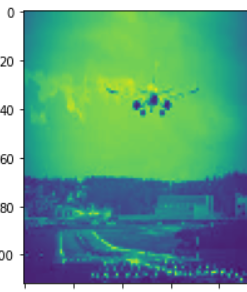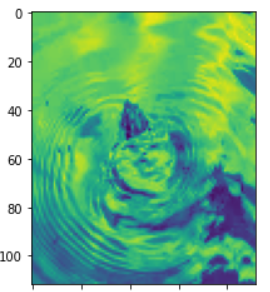

**faluire cases**

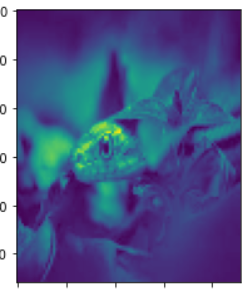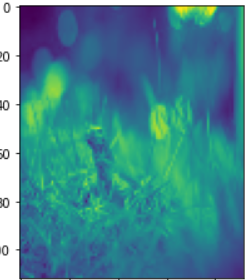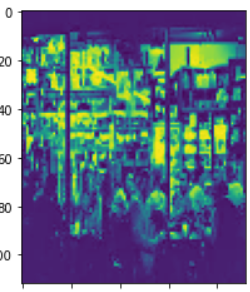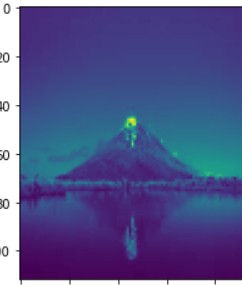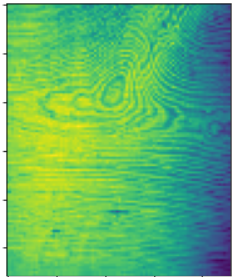

number of non-face images = 320

**success cases**

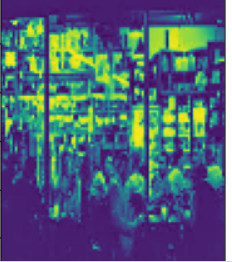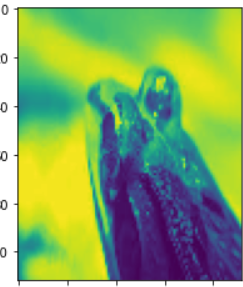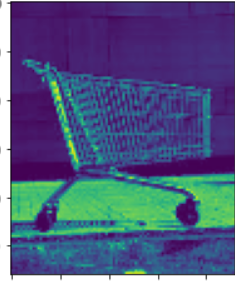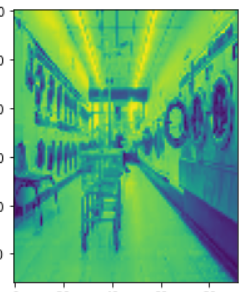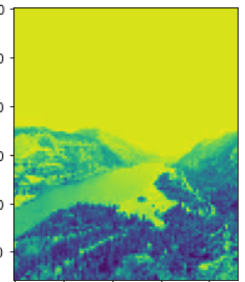

**failure cases**

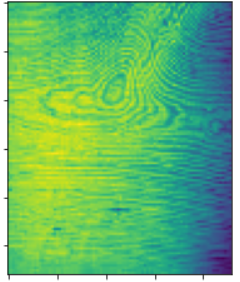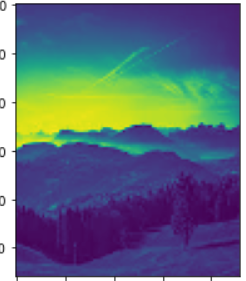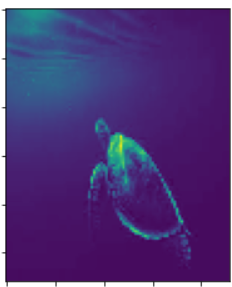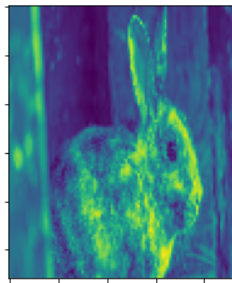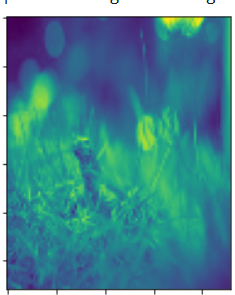

number of non-face images = 400

**success cases**

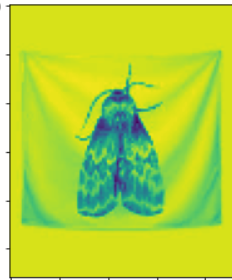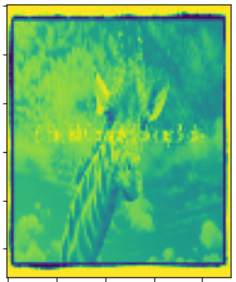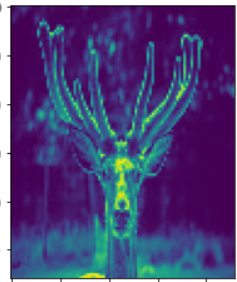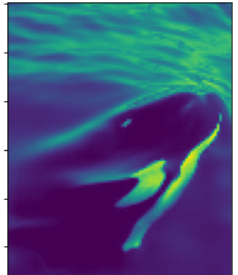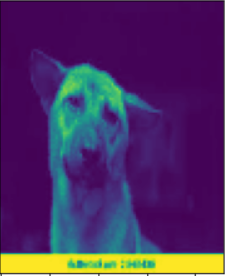

**failure cases**

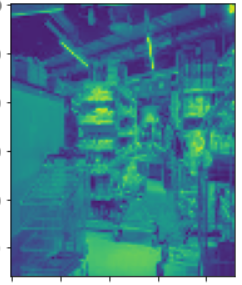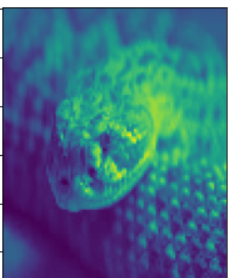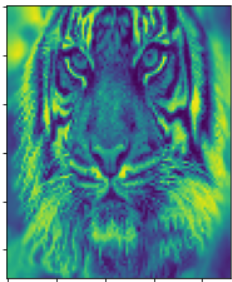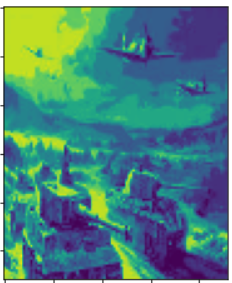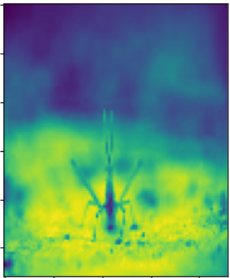

number of non-face images = 485

**success cases**

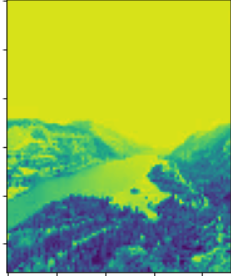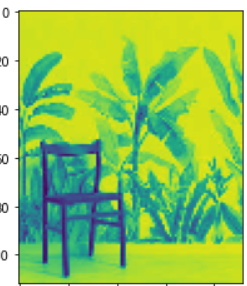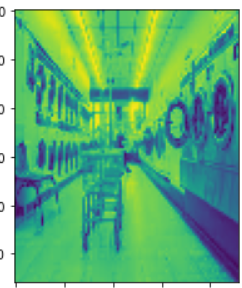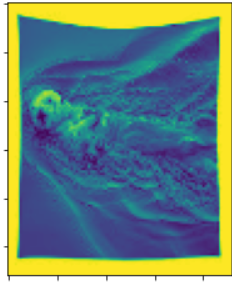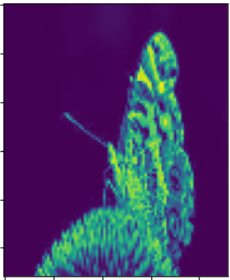

**failure cases**

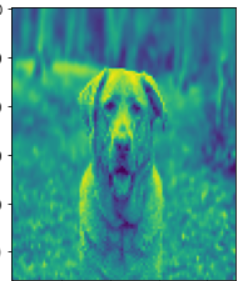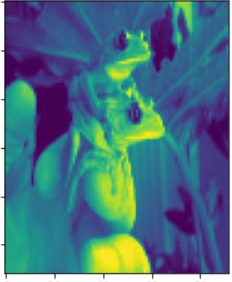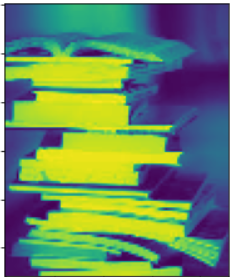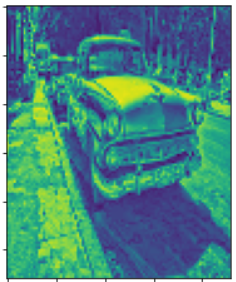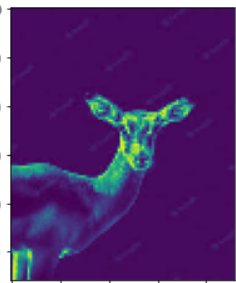

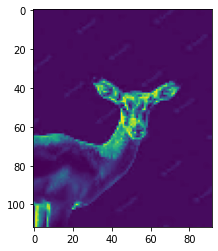

In [ ]:
plt.imshow(bad_cases[5][4].reshape(112,92))
#plt.imshow(good_cases[5][4].reshape(112,92))

tune with number of non faces to values :
80, 160, 240, 320, 400, 485

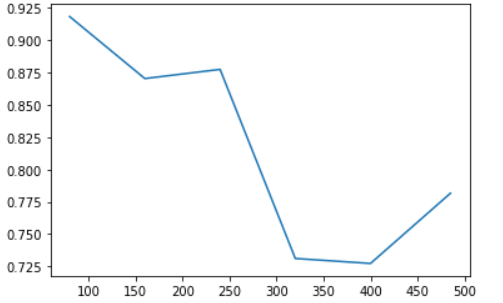


How  many  dominant  eigenvectors  will  you  use  for  the  LDA solution?

  - we use 1 dominant eignvector as we classify between 2 classes

Criticize  the accuracy  measure  for  large  numbers  of  non-faces images in the training data:
  -when we use large number of non-face that equivalent to number of faces, accuracy was not good enough but for small number of non-face , accuracy is better.
    - we also note that we maximize number of non-faces to be larger than face images, accuracy increases





---



#8. Bonus

a) Use different Training and Test splits. Change the number of instances per subject to be 7 and keep 3 instances per subject for testing. compare the results you have with the ones you got earlier with 50% split.

In [ ]:
reshaped_data = data.reshape((-1, 10, data.shape[1]))
# Extracting the first 7 rows from each group of 10
bonus_training_set = reshaped_data[:, :7, :].reshape((-1, data.shape[1]))
# Extracting the remaining 3 rows from each group of 10
bonus_testing_set = reshaped_data[:, 7:, :].reshape((-1, data.shape[1]))

reshaped_labels = label.reshape((40, 10))

bonus_training_labels = reshaped_labels[:, :7].flatten()
bonus_testing_labels = reshaped_labels[:, 7:].flatten()


print(bonus_training_set.shape)
print(bonus_training_labels.shape)
print(bonus_testing_set.shape)
print(bonus_testing_labels.shape)


(280, 10304)
(280,)
(120, 10304)
(120,)


(280, 10304)
(280,)
(120, 10304)
(120,)

PCA


In [ ]:
alpha = [0.8, 0.85, 0.9, 0.95]
values, vectors = PCA_impl_repetetive(bonus_training_set)
bonus_projection_matrices = []
for i in range(len(alpha)):
  bonus_projection_matrices.append(PCA_impl(alpha[i], values, vectors))

KeyboardInterrupt: ignored

In [ ]:
# def calculate_bonus_projected_matrices(index):
#   return reduce_dimension(bonus_projection_matrices[index], bonus_training_set), reduce_dimension(bonus_projection_matrices[index], bonus_testing_set)

In [ ]:
bonus_projected_training0, bonus_projected_testing0 = calculate_projected_matrices(bonus_projection_matrices[0], bonus_training_set, bonus_testing_set) # alpha=0.8
bonus_projected_training1, bonus_projected_testing1 = calculate_projected_matrices(bonus_projection_matrices[1], bonus_training_set, bonus_testing_set) # alpha=0.85
bonus_projected_training2, bonus_projected_testing2 = calculate_projected_matrices(bonus_projection_matrices[2], bonus_training_set, bonus_testing_set) # alpha=0.9
bonus_projected_training3, bonus_projected_testing3 = calculate_projected_matrices(bonus_projection_matrices[3], bonus_training_set, bonus_testing_set) # alpha=0.95

alpha= 0.8 -->  accuracy0 = 0.958
alpha= 0.85 -->  accuracy1 = 0.967
alpha= 0.9 -->  accuracy2 = 0.967
alpha= 0.95 -->  accuracy3 = 0.95


Text(0, 0.5, 'accuracy')

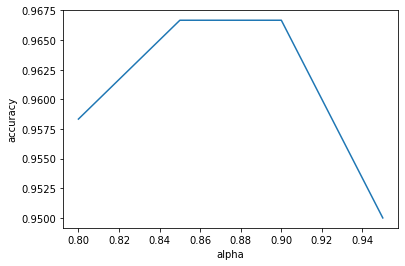

In [ ]:
accuracies = []
accuracies.append(knn1PCA(bonus_projected_training0, bonus_training_labels, bonus_projected_testing0, bonus_testing_labels))
accuracies.append(knn1PCA(bonus_projected_training1, bonus_training_labels, bonus_projected_testing1, bonus_testing_labels))
accuracies.append(knn1PCA(bonus_projected_training2, bonus_training_labels, bonus_projected_testing2, bonus_testing_labels))
accuracies.append(knn1PCA(bonus_projected_training3, bonus_training_labels, bonus_projected_testing3, bonus_testing_labels))

for i in range(len(accuracies)):
  print(f"alpha= {alpha[i]} -->  accuracy{i} = {round(accuracies[i],3)}")

plt.plot(np.array(alpha),accuracies)
plt.xlabel('alpha')
plt.ylabel('accuracy')

alpha= 0.8 -->  accuracy0 = 0.958

alpha= 0.85 -->  accuracy1 = 0.967

alpha= 0.9 -->  accuracy2 = 0.967

alpha= 0.95 -->  accuracy3 = 0.95

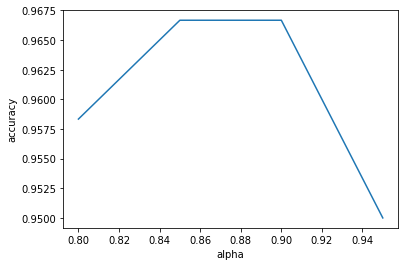

Alpha = 0.8:
for 1 neigbour -> accuracy = 0.958
for 3 neigbour -> accuracy = 0.925
for 5 neigbour -> accuracy = 0.908
for 7 neigbour -> accuracy = 0.842
Alpha = 0.85:
for 1 neigbour -> accuracy = 0.967
for 3 neigbour -> accuracy = 0.933
for 5 neigbour -> accuracy = 0.908
for 7 neigbour -> accuracy = 0.842
Alpha = 0.9:
for 1 neigbour -> accuracy = 0.967
for 3 neigbour -> accuracy = 0.917
for 5 neigbour -> accuracy = 0.892
for 7 neigbour -> accuracy = 0.85
Alpha = 0.95:
for 1 neigbour -> accuracy = 0.95
for 3 neigbour -> accuracy = 0.942
for 5 neigbour -> accuracy = 0.9
for 7 neigbour -> accuracy = 0.8


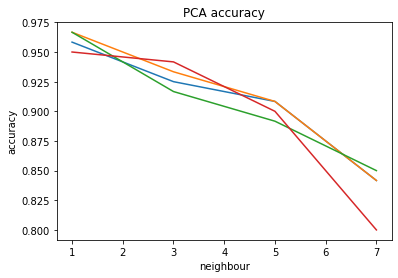

In [ ]:
KnnPCA(bonus_projected_training0, bonus_training_labels, bonus_projected_testing0, bonus_testing_labels, 0.80)
KnnPCA(bonus_projected_training1, bonus_training_labels, bonus_projected_testing1, bonus_testing_labels, 0.85)
KnnPCA(bonus_projected_training2, bonus_training_labels, bonus_projected_testing2, bonus_testing_labels, 0.90)
KnnPCA(bonus_projected_training3, bonus_training_labels, bonus_projected_testing3, bonus_testing_labels, 0.95)

Alpha = 0.8:

for 1 neigbour -> accuracy = 0.958

for 3 neigbour -> accuracy = 0.925

for 5 neigbour -> accuracy = 0.908

for 7 neigbour -> accuracy = 0.842

Alpha = 0.85:

for 1 neigbour -> accuracy = 0.967

for 3 neigbour -> accuracy = 0.933

for 5 neigbour -> accuracy = 0.908

for 7 neigbour -> accuracy = 0.842

Alpha = 0.9:

for 1 neigbour -> accuracy = 0.967

for 3 neigbour -> accuracy = 0.917

for 5 neigbour -> accuracy = 0.892

for 7 neigbour -> accuracy = 0.85

Alpha = 0.95:

for 1 neigbour -> accuracy = 0.95

for 3 neigbour -> accuracy = 0.942

for 5 neigbour -> accuracy = 0.9

for 7 neigbour -> accuracy = 0.8


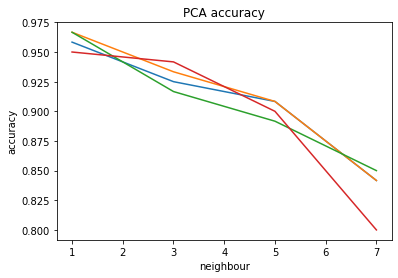

LDA

In [ ]:
bonusLDA_projection_matrix, mean_vectors = LDA(bonus_training_set, bonus_training_labels,39)

bonusLDA_projected_train_data = np.dot(bonus_training_set, bonusLDA_projection_matrix.T)
bonusLDA_projected_test_data = np.dot(bonus_testing_set, bonusLDA_projection_matrix.T)

classified data matrix:
(40, 7, 10304)
[[[ 48.  49.  45. ...  47.  46.  46.]
  [ 60.  60.  62. ...  32.  34.  34.]
  [ 39.  44.  53. ...  29.  26.  29.]
  ...
  [ 64.  76.  80. ...  35.  37.  39.]
  [ 43.  50.  41. ... 158. 153. 169.]
  [ 41.  47.  47. ...  35.  37.  38.]]

 [[ 35.  36.  37. ... 144. 147. 143.]
  [ 37.  35.  35. ...  26.  28.  28.]
  [ 30.  37.  35. ...  26.  27.  32.]
  ...
  [ 35.  32.  36. ...  25.  28.  29.]
  [ 34.  35.  35. ...  31.  24.  24.]
  [ 38.  35.  36. ... 138. 142. 141.]]

 [[103. 105. 104. ...  44.  38.  43.]
  [100.  99. 108. ...  44.  42.  44.]
  [101. 106. 102. ...  46.  50.  45.]
  ...
  [101. 104. 104. ...  42.  46.  43.]
  [110. 106. 109. ...  49.  53.  53.]
  [109. 111. 108. ...  52.  55.  48.]]

 ...

 [[109. 112. 114. ...  69.  72.  69.]
  [104. 106. 107. ...  65.  59.  73.]
  [103. 109. 105. ...  53.  58.  54.]
  ...
  [105. 109. 105. ...  81.  57.  49.]
  [114. 112. 110. ...  67.  70.  68.]
  [106. 104. 104. ...  74.  66.  68.]]

 [[ 83.  86

In [ ]:
# bonusLDA_projected_train_data = np.dot(bonus_training_set, bonusLDA_projection_matrix.T)
# bonusLDA_projected_test_data = np.dot(bonus_testing_set, bonusLDA_projection_matrix.T)

print(bonus_training_set.shape)
print(bonusLDA_projection_matrix.T.shape)
print(bonusLDA_projected_train_data.shape)
print("-----")
print(bonus_testing_set.shape)
print(bonusLDA_projection_matrix.T.shape)
print(bonusLDA_projected_test_data.shape)

(280, 10304)
(10304, 39)
(280, 39)
-----
(120, 10304)
(10304, 39)
(120, 39)


In [ ]:
accuracy = []
for i in range(1,12,2):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(bonusLDA_projected_train_data, bonus_training_labels)
  # print(knn.predict(projected_test_data))
  acc = knn.score(bonusLDA_projected_test_data, bonus_testing_labels)
  print(round(acc,3))
  accuracy.append(acc)

0.942
0.925
0.867
0.85
0.792
0.717


0.942  
0.925  
0.867  
0.85  
0.792  
0.717  

for 1 neigbour -> accuracy = 0.9416666666666667
for 3 neigbour -> accuracy = 0.925
for 5 neigbour -> accuracy = 0.8666666666666667
for 7 neigbour -> accuracy = 0.85
for 9 neigbour -> accuracy = 0.7916666666666666
for 11 neigbour -> accuracy = 0.7166666666666667


Text(0, 0.5, 'accuracy')

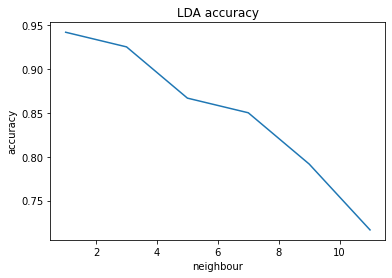

In [ ]:
for i in range(len(accuracy)):
  print(f"for {i*2+1} neigbour -> accuracy = {accuracy[i]}")
plt.plot(np.array([1,3,5,7,9,11]),accuracy)
plt.title('LDA accuracy')
plt.xlabel('neighbour')
plt.ylabel('accuracy')

for 1 neigbour -> accuracy = 0.9416666666666667  
for 3 neigbour -> accuracy = 0.925  
for 5 neigbour -> accuracy = 0.8666666666666667   
for 7 neigbour -> accuracy = 0.85  
for 9 neigbour -> accuracy = 0.7916666666666666  
for 11 neigbour -> accuracy = 0.7166666666666667

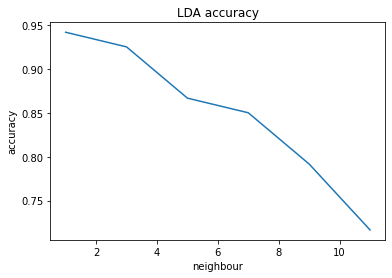

**Comparison**

**PCA**
For training = 50%, testing = 50%
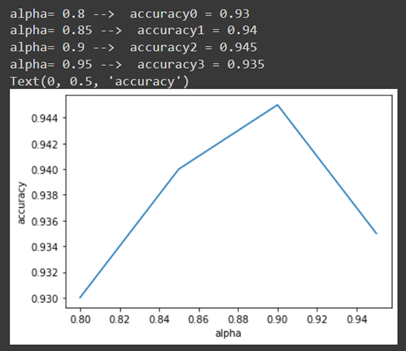

For training = 70%, testing = 30%

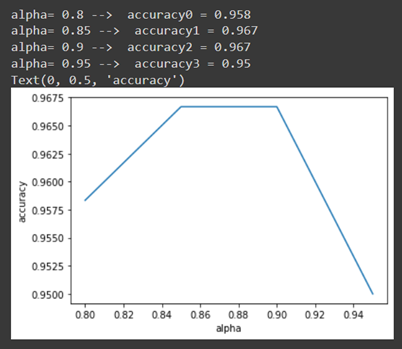


Using different Knn values (50 - 50):

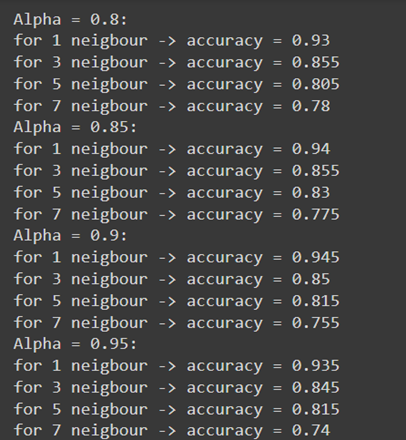

Using different Knn values (70 - 30):

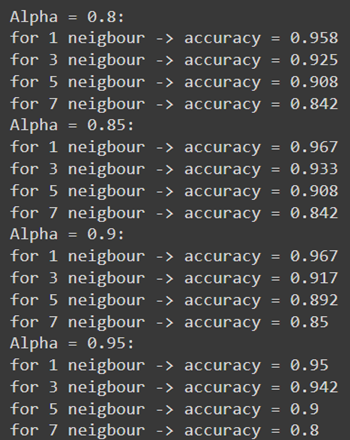


USing different Knn values (50 - 50):

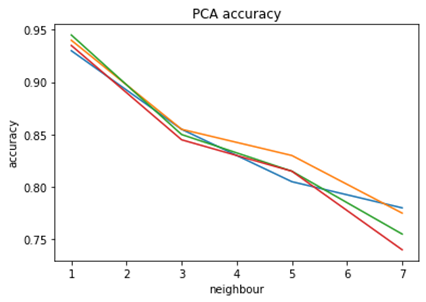

Using different Knn values (70 - 30):

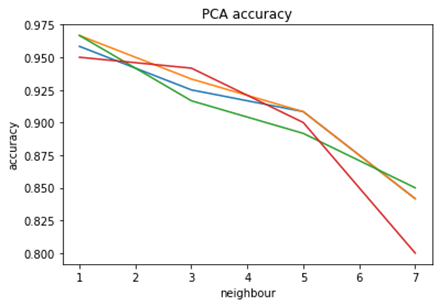

**LDA**

LDA accuracy with different neighbours

50 - 50 split:

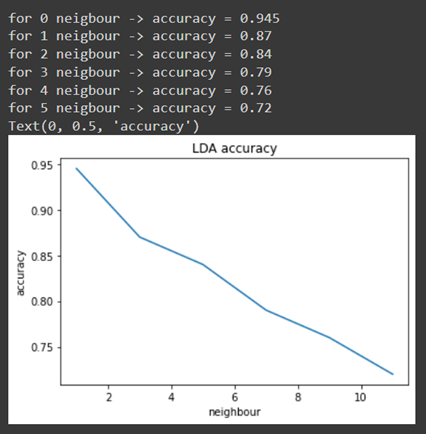


70 - 30 split:

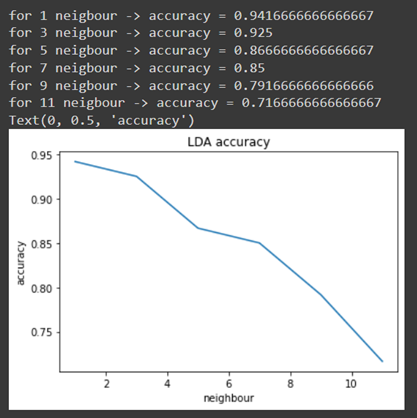

b) There are other variations of PCA and LDA beyond the original algorithms. Please use one of the variations of PCA and one variations of LDA other than the original ones. Compare the time complexity and accuracy between the 2 different PCA and LDA models.

Randomized PCA takes 2 parameters: # components, method (randomized)  
As for the standard PCA, it keeps calculating # components until reaching alpha, so we cannot preset a components number.  
Instead, we will preset the number of components in the built-in method to the equivalent alpha in the implemented one.

alpha --> # components:

0.8 --> 37

0.85 --> 53

0.9 --> 77

0.95 --> 116

We will try this four times, with different # samples, going from 100 to 400, then compare their runtime and accuracy

In [ ]:
import time
from sklearn.decomposition import PCA


alpha = [0.8, 0.85, 0.9, 0.95]
eq_compo = [37, 53, 77, 116]

implemented_times = []
builtin_times = []
implemented_proj_data_mat = []
builtin_proj_data_mat = []
implemented_proj_test_mat = []
builtin_proj_test_mat = []

In [ ]:
def PCA_variation(i):
  current_data = training_set[0:i*50+50]
  current_label = training_labels[0:i*50+50]
  current_test_set = testing_set[0:i*50+50]
  current_test_label = testing_labels[0:i*50+50] 

  impl_times = []
  buil_times = []

  # implemented PCA:
  common_start = time.time()
  current_values, current_vectors = PCA_impl_repetetive(current_data)
  common_end = time.time()
  common_total_time = common_end - common_start

  current_projection_matrices = []
  proj_data_list = []
  proj_test_list = []
  for j in range(len(alpha)):
    current_start = time.time()
    current_projection_matrices.append(PCA_impl(alpha[j], current_values, current_vectors))
    proj_data_list.append(reduce_dimension(current_projection_matrices[j], current_data))
    proj_test_list.append(reduce_dimension(current_projection_matrices[j], current_test_set))
    current_end = time.time()
    impl_times.append(round(common_total_time + current_end - current_start, 3))
  
  implemented_proj_data_mat.append(proj_data_list)
  implemented_proj_test_mat.append(proj_test_list)

  # build-in PCA (Randomized)
  proj_data_list = []
  proj_test_list = []
  for j in range(len(alpha)):
    if(eq_compo[j] <= len(current_data)):
      current_start = time.time()
      random_pca = PCA(n_components=eq_compo[j], svd_solver='randomized')
      proj_data_list.append(random_pca.fit_transform(current_data))
      proj_test_list.append(random_pca.transform(current_test_set))
      current_end = time.time()
      buil_times.append(round(current_end - current_start, 3))
  builtin_proj_data_mat.append(proj_data_list)
  builtin_proj_test_mat.append(proj_test_list)

  print(f"Implemented PCA times for {i*50+50} items for different alphas:")
  print(impl_times)
  implemented_times.append(impl_times)
  
  print(f"Built-in PCA times for {i*50+50} items for different components numbers:")
  print(buil_times)
  builtin_times.append(buil_times)


In [ ]:
for i in range(4):
  PCA_variation(i)


Implemented PCA times for 50 items for different alphas:
[204.558, 204.596, 204.639, 204.662]
Built-in PCA times for 50 items for different components numbers:
[0.21]
Implemented PCA times for 100 items for different alphas:
[244.127, 244.131, 244.214, 244.344]
Built-in PCA times for 100 items for different components numbers:
[0.161, 0.215, 0.274]
Implemented PCA times for 150 items for different alphas:
[219.013, 219.68, 219.26, 219.66]
Built-in PCA times for 150 items for different components numbers:
[0.259, 0.32, 0.38, 0.591]
Implemented PCA times for 200 items for different alphas:
[254.963, 255.218, 255.606, 255.953]
Built-in PCA times for 200 items for different components numbers:
[0.255, 0.331, 0.399, 0.732]


**If # calculated times is less than 4, then the built-in pca was calculated less than 4 times, this is because: randomized pca refuses to set # components > min(rows, dimensions) of data matrix**

Implemented PCA times for 50 items for different alphas:
[202.288, 202.3, 202.315, 202.341]  
Built-in PCA times for 50 items for different components numbers:
[0.077]

Implemented PCA times for 100 items for different alphas:
[207.647, 207.692, 207.762, 207.875]  
Built-in PCA times for 100 items for different components numbers:
[0.132, 0.17, 0.252]

Implemented PCA times for 150 items for different alphas:
[246.615, 246.796, 246.937, 248.042]  
Built-in PCA times for 150 items for different components numbers:
[0.321, 0.244, 0.456, 0.548]

Implemented PCA times for 200 items for different alphas:
[276.097, 276.518, 276.245, 276.896]  
Built-in PCA times for 200 items for different components numbers:
[0.49, 0.535, 0.868, 0.998]


for randomized pca to work, condition: # components <= min(rows, dimensions) of data matrix

First alpha is equivalent to 37 eigen vectors, while the second is equivalent to 53, and we are testing for samples numbers of 50, 100, 150, 200

So in the first run, only the first alpha satisfies the condition, that's why we have only 1 data point, so their is no relation to draw!

We begin drawing from the second run, which contains 3 data points, next 2 runs each has 4 data points.

2nd run:

In [ ]:
plt.plot(implemented_times[1][:3])

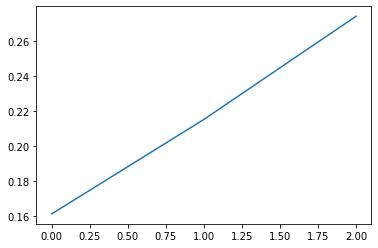

In [ ]:
plt.plot(builtin_times[1][:3])

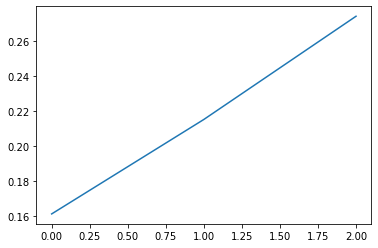

Text(0, 0.5, 'built in')

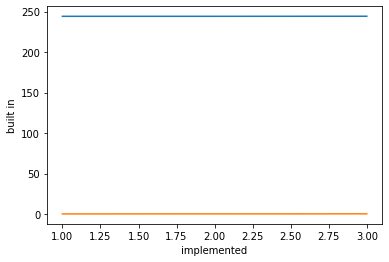

In [ ]:
plt.plot(implemented_times[1][:3])
plt.plot(builtin_times[1][:3])

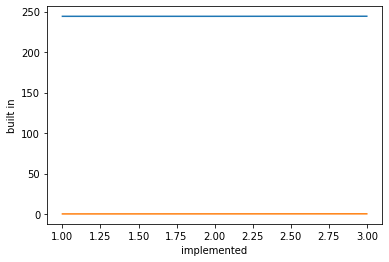

3rd run:

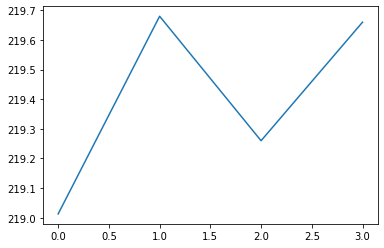

In [ ]:
plt.plot(implemented_times[2])

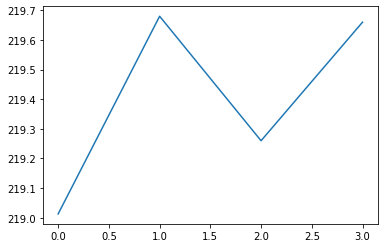

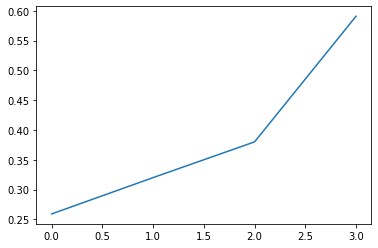

In [ ]:
plt.plot(builtin_times[2])

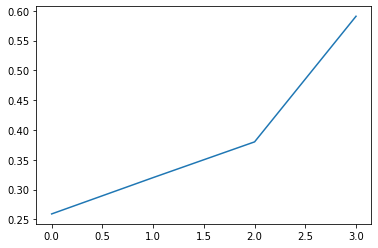

Text(0, 0.5, 'built in')

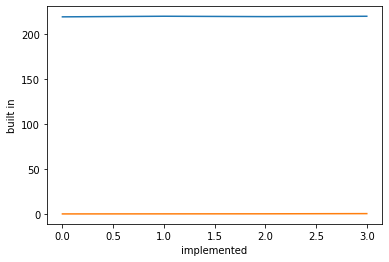

In [ ]:
plt.plot(implemented_times[2])
plt.plot(builtin_times[2])

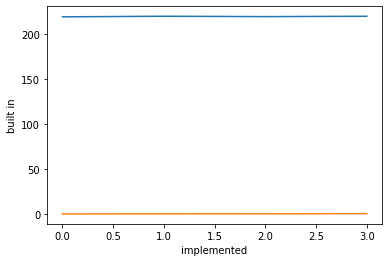

3rd run:

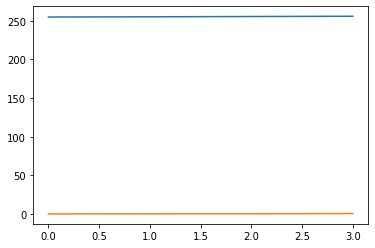

In [ ]:
plt.plot(implemented_times[3])
plt.plot(builtin_times[3])

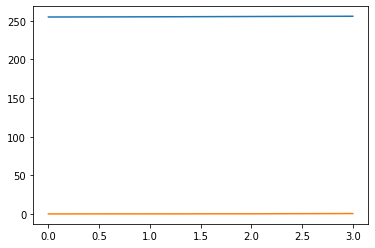

In [ ]:
print("Implemented PCA projected dimension - Build PCA projected dimension")
print()
print(len(implemented_proj_data_mat))
for i in range(len(builtin_proj_data_mat)):
  for j in range(len(builtin_proj_data_mat[i])):
    print(f"{str(j)}: {implemented_proj_data_mat[i][j].shape} - {builtin_proj_data_mat[i][j].shape}")

Implemented PCA projected dimension - Build PCA projected dimension

4
0: (50, 14) - (50, 37)
0: (100, 25) - (100, 37)
1: (100, 34) - (100, 53)
2: (100, 46) - (100, 77)
0: (150, 31) - (150, 37)
1: (150, 43) - (150, 53)
2: (150, 62) - (150, 77)
3: (150, 91) - (150, 116)
0: (200, 37) - (200, 37)
1: (200, 53) - (200, 53)
2: (200, 77) - (200, 77)
3: (200, 116) - (200, 116)


Just to make sure they have the same # samples, and to see the number of components in each method:

Implemented PCA projected dimension - Build PCA projected dimension

0: (50, 14) - (50, 37)

1: (50, 14) - (100, 37)

2: (50, 19) - (100, 53)

3: (50, 25) - (100, 77)

4: (50, 34) - (150, 37)

5: (100, 25) - (150, 53)

6: (100, 34) - (150, 77)

7: (100, 46) - (150, 116)

8: (100, 65) - (200, 37)

9: (150, 31) - (200, 53)

10: (150, 43) - (200, 77)

11: (150, 62) - (200, 116)

**Measuring Accuracies**

In [ ]:
# Global Arrays (2d) to be exported
impl_pca_accuracies = []
builtin_pca_accuracies = []
for i in range(len(builtin_proj_data_mat)):
  # Local Arrays that help with forming global Arrays
  arr_impl = []
  arr_builtin = []
  for j in range(len(builtin_proj_data_mat[i])):
    arr_impl.append(knn1PCA(implemented_proj_data_mat[i][j], training_labels[0:i*50+50], implemented_proj_test_mat[i][j], testing_labels[0:i*50+50] ))
    arr_builtin.append(knn1PCA(builtin_proj_data_mat[i][j], training_labels[0:i*50+50], builtin_proj_test_mat[i][j], testing_labels[0:i*50+50]))
  impl_pca_accuracies.append(arr_impl)
  builtin_pca_accuracies.append(arr_builtin)

# plotAlphaTotal is used to know each dimension's alphas values
plotAlphaTotal = []
for i in range(len(impl_pca_accuracies)):
  plotAlpha = []
  for j in range(len(impl_pca_accuracies[i])):
    plotAlpha.append(alpha[j])
    print(f"for #samples = {i*50+50} & alpha = {alpha[j]} -->  accuracy of implemented pca{i} = {round(impl_pca_accuracies[i][j],3)}")
    print(f"for #samples = {i*50+50} & alpha = {alpha[j]} -->  accuracy of random built-in pca{i} = {round(builtin_pca_accuracies[i][j],3)}")
    print()
  print()
  plotAlphaTotal.append(plotAlpha)

for #samples = 50 & alpha = 0.8 -->  accuracy of implemented pca0 = 0.96
for #samples = 50 & alpha = 0.8 -->  accuracy of random built-in pca0 = 0.96


for #samples = 100 & alpha = 0.8 -->  accuracy of implemented pca1 = 0.96
for #samples = 100 & alpha = 0.8 -->  accuracy of random built-in pca1 = 0.96

for #samples = 100 & alpha = 0.85 -->  accuracy of implemented pca1 = 0.96
for #samples = 100 & alpha = 0.85 -->  accuracy of random built-in pca1 = 0.96

for #samples = 100 & alpha = 0.9 -->  accuracy of implemented pca1 = 0.96
for #samples = 100 & alpha = 0.9 -->  accuracy of random built-in pca1 = 0.96


for #samples = 150 & alpha = 0.8 -->  accuracy of implemented pca2 = 0.973
for #samples = 150 & alpha = 0.8 -->  accuracy of random built-in pca2 = 0.973

for #samples = 150 & alpha = 0.85 -->  accuracy of implemented pca2 = 0.973
for #samples = 150 & alpha = 0.85 -->  accuracy of random built-in pca2 = 0.973

for #samples = 150 & alpha = 0.9 -->  accuracy of implemented pca2 = 0.973

**PS:** We notice that the accuracies are nearly the same for all cases, except for 200 samples & alpha 0.9, there is a very tiny error (0.945 - 0.94)

*Result of the above code*

for #samples = 50 & alpha = 0.8 -->  accuracy of implemented pca0 = 0.96  
for #samples = 50 & alpha = 0.8 -->  accuracy of random built-in pca0 = 0.96

for #samples = 100 & alpha = 0.8 -->  accuracy of implemented pca1 = 0.96  
for #samples = 100 & alpha = 0.8 -->  accuracy of random built-in pca1 = 0.96

for #samples = 100 & alpha = 0.85 -->  accuracy of implemented pca1 = 0.96  
for #samples = 100 & alpha = 0.85 -->  accuracy of random built-in pca1 = 0.96

for #samples = 100 & alpha = 0.9 -->  accuracy of implemented pca1 = 0.96  
for #samples = 100 & alpha = 0.9 -->  accuracy of random built-in pca1 = 0.96

for #samples = 150 & alpha = 0.8 -->  accuracy of implemented pca2 = 0.973  
for #samples = 150 & alpha = 0.8 -->  accuracy of random built-in pca2 = 0.973

for #samples = 150 & alpha = 0.85 -->  accuracy of implemented pca2 = 0.973  
for #samples = 150 & alpha = 0.85 -->  accuracy of random built-in pca2 = 0.973

for #samples = 150 & alpha = 0.9 -->  accuracy of implemented pca2 = 0.973  
for #samples = 150 & alpha = 0.9 -->  accuracy of random built-in pca2 = 0.973

for #samples = 150 & alpha = 0.95 -->  accuracy of implemented pca2 = 0.973  
for #samples = 150 & alpha = 0.95 -->  accuracy of random built-in pca2 = 0.973

for #samples = 200 & alpha = 0.8 -->  accuracy of implemented pca3 = 0.93  
for #samples = 200 & alpha = 0.8 -->  accuracy of random built-in pca3 = 0.93

for #samples = 200 & alpha = 0.85 -->  accuracy of implemented pca3 = 0.94  
for #samples = 200 & alpha = 0.85 -->  accuracy of random built-in pca3 = 0.94

for #samples = 200 & alpha = 0.9 -->  accuracy of implemented pca3 = 0.945  
for #samples = 200 & alpha = 0.9 -->  accuracy of random built-in pca3 = 0.94

for #samples = 200 & alpha = 0.95 -->  accuracy of implemented pca3 = 0.935  
for #samples = 200 & alpha = 0.95 -->  accuracy of random built-in pca3 = 0.94


Nothing shown for only 1 data point!

Text(0, 0.5, 'accuracy')

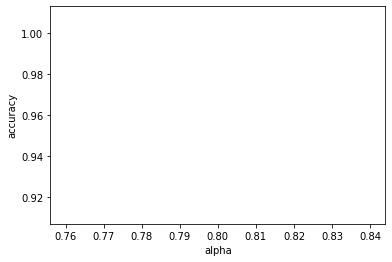

In [ ]:
  plt.plot(np.array(plotAlphaTotal[0]), np.array(impl_pca_accuracies[0]))
  plt.plot(np.array(plotAlphaTotal[0]), np.array(builtin_pca_accuracies[0]))
  plt.xlabel('alpha')
  plt.ylabel('accuracy')

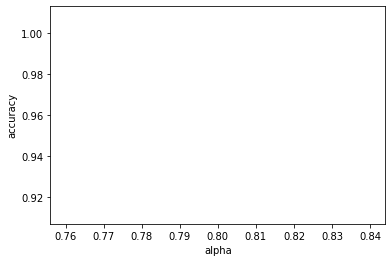

2nd run: 3 data points

Text(0, 0.5, 'accuracy')

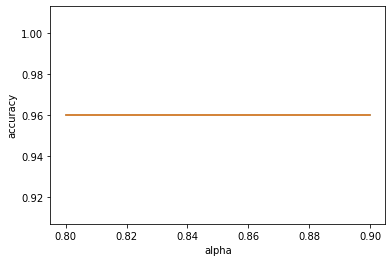

In [ ]:
  plt.plot(np.array(plotAlphaTotal[1]), np.array(impl_pca_accuracies[1]))
  plt.plot(np.array(plotAlphaTotal[1]), np.array(builtin_pca_accuracies[1]))
  plt.xlabel('alpha')
  plt.ylabel('accuracy')

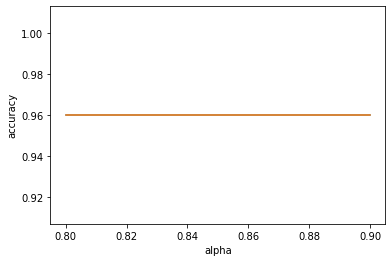

3rd run: 4 data points

Text(0, 0.5, 'accuracy')

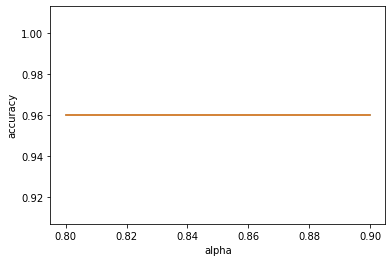

In [ ]:
  plt.plot(np.array(plotAlphaTotal[1]), np.array(impl_pca_accuracies[1]))
  plt.plot(np.array(plotAlphaTotal[1]), np.array(builtin_pca_accuracies[1]))
  plt.xlabel('alpha')
  plt.ylabel('accuracy')

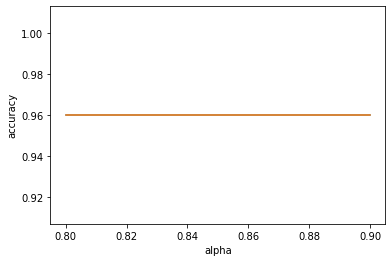

4th run: 4 data points

Text(0, 0.5, 'accuracy')

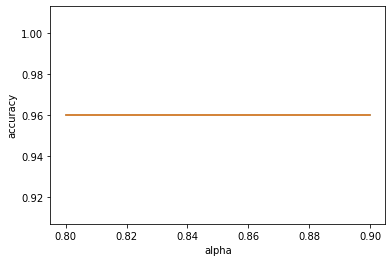

In [ ]:
  plt.plot(np.array(plotAlphaTotal[1]), np.array(impl_pca_accuracies[1]))
  plt.plot(np.array(plotAlphaTotal[1]), np.array(builtin_pca_accuracies[1]))
  plt.xlabel('alpha')
  plt.ylabel('accuracy')

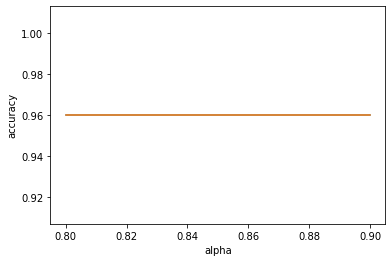

bonus 2 - LDA part

Not implemented! 

In [ ]:
bonus2_proj_matrices = []
bonus2_proj_train = []
bonus2_proj_test = []

componentsN = [15, 30, 45]

In [ ]:
for i in range(3):
  bonusLDA_projection_matrix, mean_vectors = LDA(bonus_training_set, bonus_training_labels,25)
  bonusLDA_projected_train_data = np.dot(bonus_training_set, bonusLDA_projection_matrix.T)
  bonusLDA_projected_test_data = np.dot(bonus_testing_set, bonusLDA_projection_matrix.T)

  bonus2_proj_matrices.append(bonusLDA_projection_matrix)
  bonus2_proj_train.append(bonusLDA_projected_train_data)
  bonus2_proj_test.append(bonusLDA_projected_test_data)

In [ ]:
accuracy = []
for i in range(1,8,2):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(projected_train_data, training_labels)
  # print(knn.predict(projected_test_data))
  acc = knn.score(projected_test_data, testing_labels)
  print(acc)
  accuracy.append(acc)

***Comments:***

